Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.
Имеем 3 таблицы.
1я с определением гипотез
2я с информацией о заказах
файл с группой А/Б теста и пользователях.

<span style="color:#2E8B57"> 
    Часть 1. Приоритизация гипотез.
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
    
Что будем делать:
1. Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
2. Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
3. Укажим, как изменилась приоритизация гипотез при применении RICE вместо ICE. 
    
Часть 2. Анализ A/B-теста
    
Провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Проанализируем A/B-тест:
    
1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.
2. Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.
3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.
4. Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.
5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.
6. Построем точечный график количества заказов по пользователям. Сделаем выводы и предположения.
7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
8. Построим точечный график стоимостей заказов. Сделаем выводы и предположения.
9. Посчитаим 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.
11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.
12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.
13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.
    
Примим решение по результатам теста. </span>

__Часть 1. Приоритизация гипотез.__

Сначало преобразуем данные.


In [1]:
import pandas as pd

data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
data.columns = [x.lower().replace(' ', '_') for x in data.columns]
pd.options.display.max_colwidth = 1
data


,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Примените фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [2]:

data['ICE']=(data['impact']*data['confidence'])/data['efforts']
data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).style.format('{:.3f}', subset='ICE')


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


Примените фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [3]:
data['RICE']=(data['impact']*data['confidence']*data['reach'])/data['efforts']
display(data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


У 7 гипотезы самое большое колличество затронутых пользователей из-за чего в RICE находиться на первом месте, а у 8й самый большой еффект влияния, по этому в ICE на первом месте. 

__Часть 2. Анализ A/B-теста__

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

<span style="color:#2E8B57"> Проведем преобразования данных

In [4]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import matplotlib as mpl
import seaborn as sns
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [5]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
dubli_orders=orders.pivot_table(index='visitorId', values='group', aggfunc='nunique').reset_index()
display(dubli_orders.head())
display("Число пользователей находящихся в двух группах:", dubli_orders.query('group == 2')['visitorId'].count())

,visitorId,group
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


'Число пользователей находящихся в двух группах:'

58

In [7]:
display(orders.isna().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [8]:
display(orders['transactionId'].duplicated().sum())
display(orders['visitorId'].duplicated().sum())

0

166

In [9]:
datesGroups = orders[['date', 'group']].drop_duplicates()

Удалили дубликаты

In [10]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


1. Построим график кумулятивной выручки по группам.

In [11]:
#Группируем данные
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]


# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


In [12]:
cumulativeData


,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


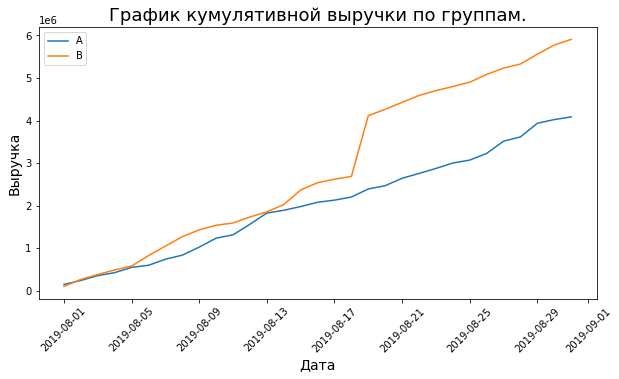

In [13]:
plt.figure(figsize=(10, 5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation = 45)
plt.title('График кумулятивной выручки по группам.', fontsize=18)
plt.ylabel('Выручка', fontsize=14)
plt.xlabel('Дата', fontsize=14)
plt.legend()
       
plt.show() 

Сегмент В почти всегда лидирует, только в середине теста сегменты встретелись, затем "В" вырвался в лидеры. Возможно влияют выбросы.

2. Построим график кумулятивного среднего чека по группам. 

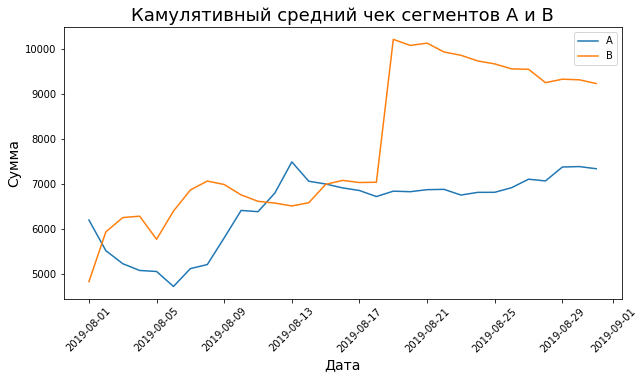

In [14]:

plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation = 45)
plt.title('Камулятивный средний чек сегментов А и В', fontsize=18)
plt.ylabel('Сумма', fontsize=14)
plt.xlabel('Дата', fontsize=14)
plt.legend()
       
plt.show() 

График колеблеться. Приниматьрешение пока рано. 

3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

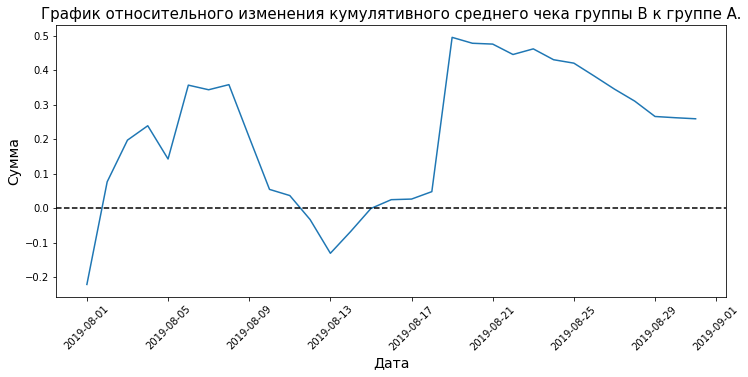

In [15]:

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X

plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation = 45)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A.', fontsize=15)
plt.ylabel('Сумма', fontsize=14)
plt.xlabel('Дата', fontsize=14)
     
plt.show() 

Где график резко меняется, там скорее всего скрыты анамалии.

4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. 

(18109.0, 18137.0, 0.0, 0.05)

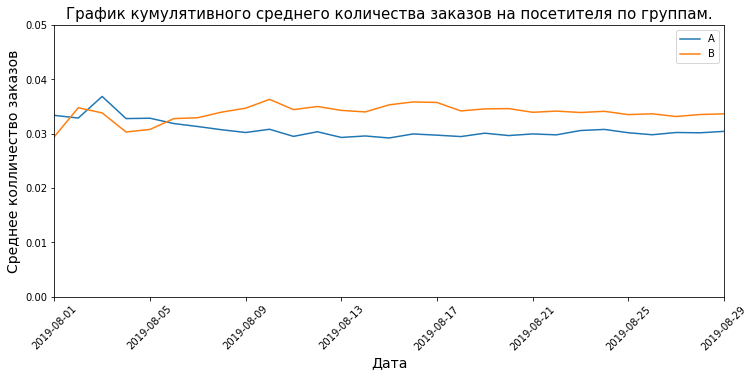

In [16]:

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation = 45)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам.', fontsize=15)
plt.ylabel('Среднее колличество заказов', fontsize=14)
plt.xlabel('Дата', fontsize=14)
plt.legend()
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 29), 0, 0.05]) 

В начале был небольшое колебание и сегмент А имелбольшуюконверсию, но 5 агуста сегмент В заняллидирующую позицию и уже с нее не слез.

5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

Text(0.5, 0, 'Дата')

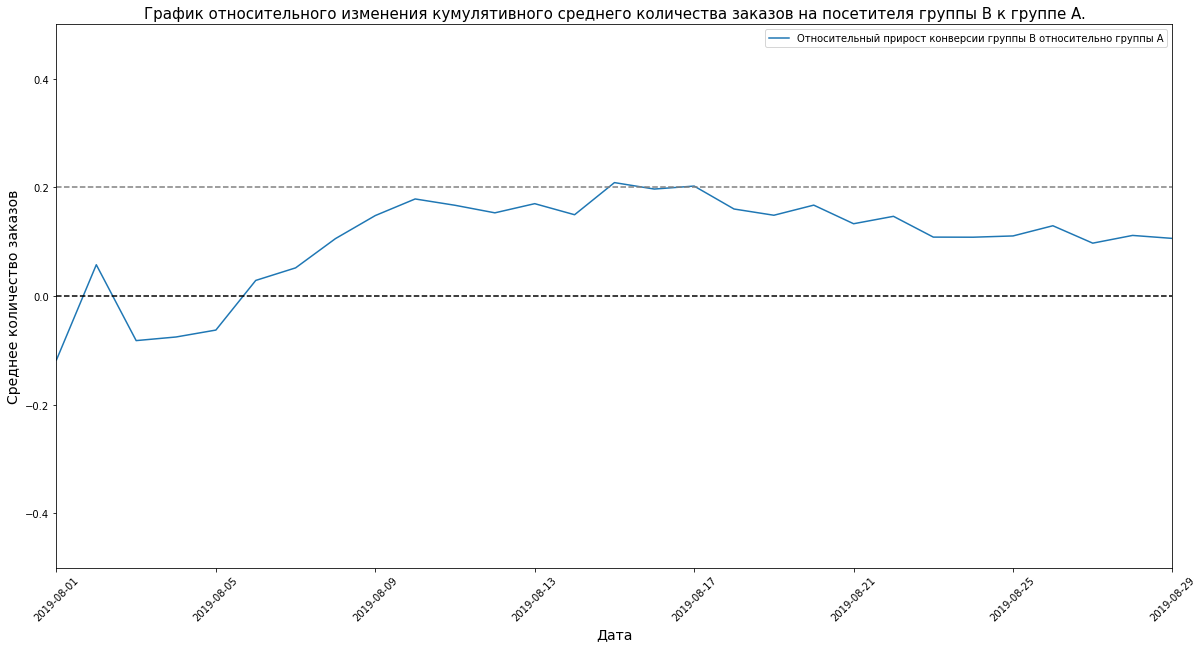

In [17]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(20, 10))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.xticks(rotation = 45)
plt.axis(["2019-08-01", '2019-08-29', -0.5, 0.5]) 
plt.legend()
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.', fontsize=15)
plt.ylabel('Среднее количество заказов', fontsize=14)
plt.xlabel('Дата', fontsize=14)

В период с 13-19 августа 2019 года,прикрост сегмента В был выше на 20% затем опускался, но все же был вше сегмента А.

6. Построим точечный график количества заказов по пользователям. 

In [18]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


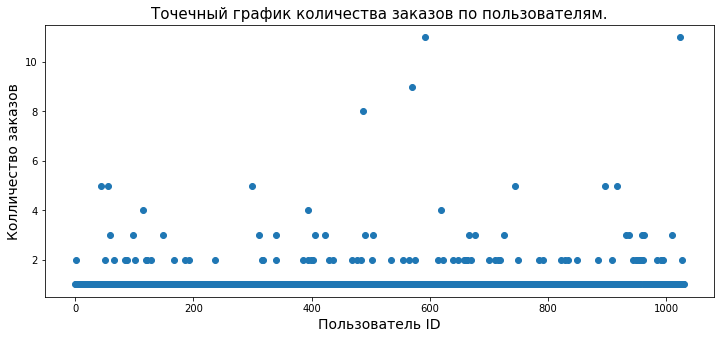

In [19]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']


x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(12, 5))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечный график количества заказов по пользователям.', fontsize=15)
plt.ylabel('Колличество заказов', fontsize=14)
plt.xlabel('Пользователь ID', fontsize=14)
x_values = pd.Series(range(0, len(ordersByUsers)))

Большенство покупателей совершили 1 менее 2 покупки, другое количествопокупок это редкость.
Чтобы разобраться необходимо посчитать выборочные перентили.

7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [20]:

print(np.percentile(ordersByUsers['orders'], [95, 99])) 


[2. 4.]


Не белее 5% сделали больше 2х покупок и не более 1% более 4х покупкок

8. Построим точечный график стоимостей заказов.

Text(0.5, 0, 'Пользователь ID')

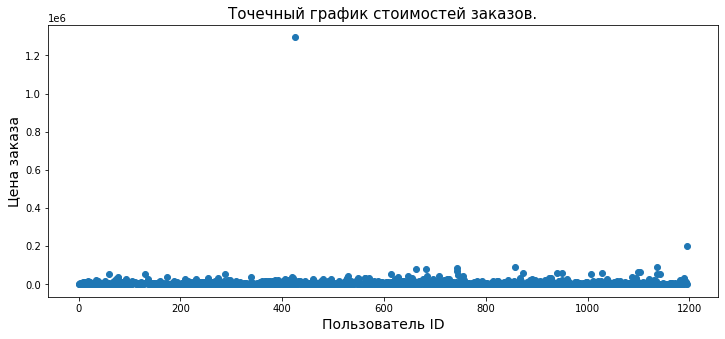

In [21]:


x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(12, 5))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов.', fontsize=15)
plt.ylabel('Цена заказа', fontsize=14)
plt.xlabel('Пользователь ID', fontsize=14)

In [22]:
 orders['revenue'].sort_values()

584     50     
1091    50     
756     50     
459     50     
1013    60     
        ..     
744     86620  
1136    92550  
858     93940  
1196    202740 
425     1294500
Name: revenue, Length: 1197, dtype: int64

(0.0, 93940.0)

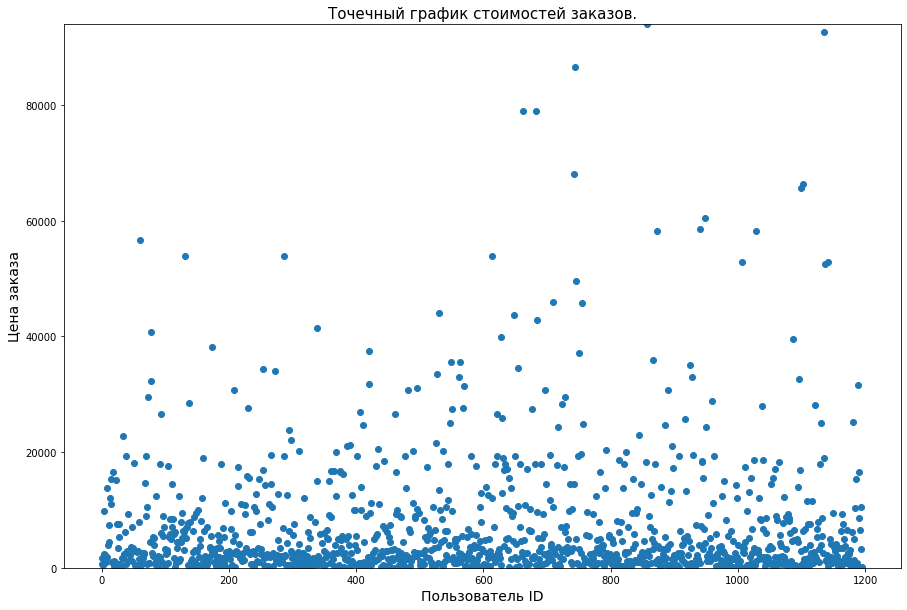

In [23]:
# Без выбросов
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(15, 10))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов.', fontsize=15)
plt.ylabel('Цена заказа', fontsize=14)
plt.xlabel('Пользователь ID', fontsize=14)
plt.ylim([0, 93940])

По этому графику сразу видно что основная масса заказа до 25 000. Есть 2 явных выброса более 1,2 млн. и около 200 тыс. Какие-то ну очень дорогие покупки.

9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберим границу для определения аномальных заказов.

In [24]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более 5% заказов чек дороже 28000 и не больше 1% заказов - дороже 58233,2

10. Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. Нулевая: различий в в среднем числе заказов на пользователя и среднем чеке между группами - нет. Альтернативная: различия в среднем между группами есть.

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

<span style="color:#2E8B57">  Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [25]:


ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

In [26]:
ordersByUsersA.head()

,visitorId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [27]:


sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                (visitors[visitors['group']=='A']['visitors'].sum()) - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                (visitors[visitors['group']=='B']['visitors'].sum()) - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)



In [28]:
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.01679
0.138


P-value меньше чем 0,05 поэтому нулевую гипотезу отвергаем

11. Теперь проверим статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [29]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


0.729
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.  Оносительное различие чека 25,9%

12. Напомним, что найденные в прошлых уроках 95-й и 99-й перцентили средних чеков равны 28 000 и 58 233 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.

Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 30 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 30 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [30]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
               (visitors[visitors['group']=='A']['visitors'].sum()) - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
               (visitors[visitors['group']=='B']['visitors'].sum()) - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
#Применим статистический критерий Манна-Уитни к полученным выборкам:
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


0.01334
0.172


<span style="color:#2E8B57">  Нулевую гипотезу отвергаем. Различия стали больше.

13. Посчитаем статистическую значимость различия средних чеков после удаления аномальных пользователей.

In [31]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.720
-0.023


P-value незначительно уменьшился, но и разница между сегментами сократилась с 25,9% до 2,3% в пользу сегмента А.
Сначит в сегменте В было много анамалий,которые сильно влияли на результат.

Имеющиеся факты:
 - Нет статистически значимого различия по среднему количеству заказов между группами ни по «сырым», ни по данным после фильтрации аномалий;
 - Есть статистически значимые различия по среднему чеку между группами и по «сырым», и по данным после фильтрации аномалий, но после удаления анамалий дисперсия сильно снизилась, до отрицательного значения, а значит сегмент А стал выигрывать;
 - График различия конверсии между группами сообщает, что результаты группы B лучше группы A.
 
 
 
 По итогу проведенного теста, стало понятно, что испытания повлияли положительно, и покупать слали больше в сегменте В.



    
   **В первой части мы анализировали таблицу с гипотезами. У 7 гипотезы (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	11.200) самое большое колличество затронутых пользователей из-за чего в RICE находиться на первом месте, а у 8й (Запустить акцию, дающую скидку на товар в день рождения) самый большой еффект влияния, по этому в ICE на первом месте.**
    


    
    
  **В целом по кумулятотивному среднему чуку, выручке по группам и колличеству заказов, среднему по заказам - выигрывает сегмент В.
    Есть около 2% выбросов более 5 заказаот от одного покупателя и 2 сильных выбраса на более 200 000 и 1,3 млн руб., основное колличество заказов на сумму не более 30 000 руб. 
    по результатам анализа А/В теста число закзов по "сырым" данным, имеет разнизу между сегиентами в сторону Сегмента В, а средний чек не отличается. После того как мы откинули анОмальные показатели (это за более 2х закао от покупателя и на цену выше 30000), средний чек стал еще более схож между сегментами, но у сегмента В стал в среднем меньше, зато колличество заказов стало больше.  
    Возможно была какая-то скидка))**
    </span>